In [18]:
# basic modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix, fbeta_score, roc_curve, roc_auc_score

#settings
warnings.filterwarnings('ignore')
rs = 42

In [20]:
df = pd.read_csv('./data/mimic_premodel.csv')

# Scaling and Train/Test-Split

In [21]:
X = df.iloc[:, 1:]
y = df.label

In [22]:
X.head()

,label,hadm_id,icustay_id,subject_id,age,numb_diagn,los,tracheo,PaO2,base_excess,...,leuko,mean_insp_pr,resp_rat,tidal_vol,breath_min_vol,ismale,icu_CSRU,icu_MICU,icu_SICU,icu_TSICU
0,1,100016,217590,68591,56.0,11,6.1731,1,86.0,2.0,...,10.7,6.0,18.0,653.0,11.754,1,0,1,0,0
1,1,100017,258320,16229,28.0,8,0.6924,0,171.0,4.0,...,9.3,6.4,20.0,430.0,8.600,1,0,1,0,0
2,1,100035,245719,48539,37.0,26,10.5061,0,39.0,10.0,...,17.2,6.0,16.0,151.0,2.416,1,0,1,0,0
3,1,100063,241782,69282,46.0,11,1.6501,0,365.0,2.0,...,8.4,1.0,18.0,441.0,7.938,1,0,1,0,0
4,1,100087,294404,42255,57.0,18,3.7287,0,143.0,5.0,...,8.5,7.0,17.0,481.0,8.177,1,0,0,0,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=rs, stratify=y)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 4283 samples.
Testing set has 1428 samples.


In [9]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Dummy

In [10]:
dumm = DummyClassifier(strategy= "stratified", random_state=rs)
dumm.fit(X_train, y_train)
y_pred_dumm = dumm.predict(X_test)
print(classification_report(y_test, y_pred_dumm))
print(confusion_matrix(y_test, y_pred_dumm))
print(f'F-Beta-Score(0.5) =  {fbeta_score(y_test, y_pred_dumm, beta=0.5 ):.2f}')


              precision    recall  f1-score   support

           0       0.34      0.34      0.34       492
           1       0.65      0.66      0.66       936

    accuracy                           0.55      1428
   macro avg       0.50      0.50      0.50      1428
weighted avg       0.55      0.55      0.55      1428

[[168 324]
 [322 614]]
F-Beta-Score(0.5) =  0.65


In [19]:
y_pred_dumm_prob = dumm.predict_proba(X_test)
print(f'ROC-AUC-Score = {roc_auc_score(y_test, y_pred_dumm_prob[:,1]):.2f}')

ROC-AUC-Score = 0.50


# Base Model

zuerst Standardeinstellungen für die Hyperparameter, danach Hyperparameter-Tuning (Random- und Grid-Search)

logistic regression (Jacqueline)  
decision tree (Nina)   
random forest (Nina)  
XGBoost (Niko)  
AdaBoost (Niko)  
SVM (Mirko)   
kNN (Mirko)   
Naive Bayes (Jacqueline) 

## Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

### Hyperparameter by default

In [12]:
lr = LogisticRegression(random_state=rs)
lr.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(f'F-Beta-Score(0.5) =  {fbeta_score(y_test, y_pred_lr, beta=0.5 ):.2f}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       492
           1       1.00      1.00      1.00       936

    accuracy                           1.00      1428
   macro avg       1.00      1.00      1.00      1428
weighted avg       1.00      1.00      1.00      1428

[[492   0]
 [  0 936]]
F-Beta-Score(0.5) =  1.00


## Decision Tree 

In [8]:
from sklearn.tree import DecisionTreeRegressor 

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [9]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)

NameError: name 'y_true' is not defined

## Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train) 
y_pred= rnd_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)

## XGBoost

## AdaBoost

## SVM

## kNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, accuracy_score, f1_score, recall_score, precision_score

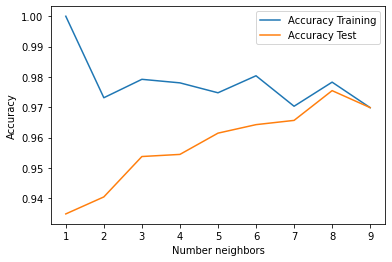

In [9]:
train_accuracy = []
test_accuracy = []

# Probiere Werte für k von 1 bis 10 aus
neighbor_settings = range(1, 10)

for k in neighbor_settings:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbor_settings, train_accuracy, label='Accuracy Training')
plt.plot(neighbor_settings, test_accuracy, label='Accuracy Test')
plt.ylabel('Accuracy')
plt.xlabel('Number neighbors')
plt.legend();

## Naive Bayes